In [2]:
import sys
import os, glob 
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# Ruta de trabajo
path = "C:/Proyectos/salidas"
os.chdir(path)
print ("Ruta de trabajo:   " + path)

Ruta de trabajo:   C:/Proyectos/salidas


In [5]:
img=cv2.imread("yop_jul.jpg")
# Convertir imagen original a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


## Reducir imagen

In [7]:
# Reducir resolución (50% del tamaño original)
img_small = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Convertir a RGB para mostrarla con matplotlib
img_small_rgb = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)

# Mostrar imagen reducida
# plt.imshow(img_small_rgb)



# Crear máscara para rojo en HSV

In [80]:
lower_red1 = np.array([0, 20, 20])
upper_red1 = np.array([4, 255, 255])

lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

###  Crear máscara para rojo en HSV

In [81]:
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)

# Combinación de ambas máscaras:
mask = cv2.bitwise_or(mask1, mask2)


In [82]:
# apply morphology and make 3 channels as mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [83]:
# Convertir máscara a tres canales para usar con imágenes a color
mask_3ch = cv2.merge([mask, mask, mask])

In [84]:
# Crear versión en escala de grises desde la original en BGR
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

In [85]:
# Aplicar la máscara correctamente sobre imagen en color y escala de grises
result = np.where(mask_3ch==255, img, gray)


In [86]:
# Guardar resultado
cv2.imwrite('Rojo.jpg', result)

True

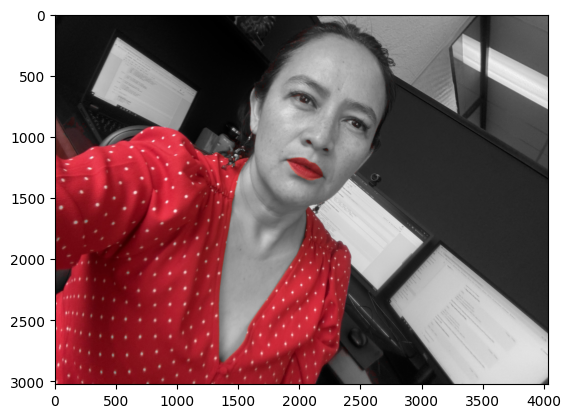

In [87]:
# Para visualizar en matplotlib
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
